# Assignment 2: recommender System

## Code from the lecture

In [1]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [2]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [26]:
#method to easy exchange distance measure methods
def calcDistanceWith(D,distance_measure):
    for i in range(0,np.shape(movies)[0]):
        for j in range(0,np.shape(movies)[0]):
            if i!=j:
                D[i,j]=distance_measure(R[:,i],R[:,j])

In [27]:
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [23]:
#again, implementation not efficient: better use lamda opperators 
D_cosine=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
calcDistanceWith(D_cosine,CosineDist)

In [51]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [249]:
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
D=D_cosine
CII("Casablanca")

recommending movies for: 'Casablanca (1942)'


133                                  Citizen Kane (1941)
131                             Wizard of Oz, The (1939)
483                           Maltese Falcon, The (1941)
473    Dr. Strangelove or: How I Learned to Stop Worr...
134                         2001: A Space Odyssey (1968)
Name: title, dtype: object

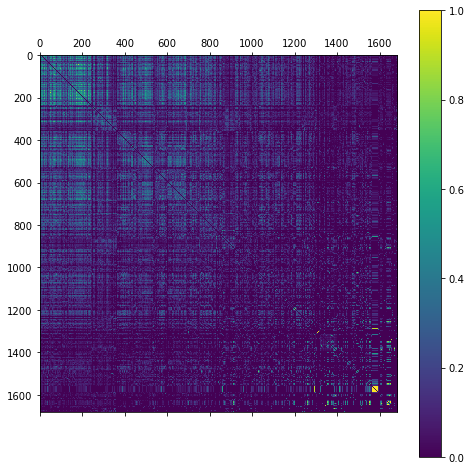

In [57]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_cosine)
plt.colorbar()

In [37]:
def EucledianDist(a,b):
    return np.linalg.norm(b-a)

In [38]:
D_eucledian=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
calcDistanceWith(D_eucledian,EucledianDist)

In [53]:
D=D_eucledian
CII("Casablanca")

recommending movies for: 'Casablanca (1942)'


257          Contact (1997)
299    Air Force One (1997)
312          Titanic (1997)
287           Scream (1996)
49         Star Wars (1977)
Name: title, dtype: object

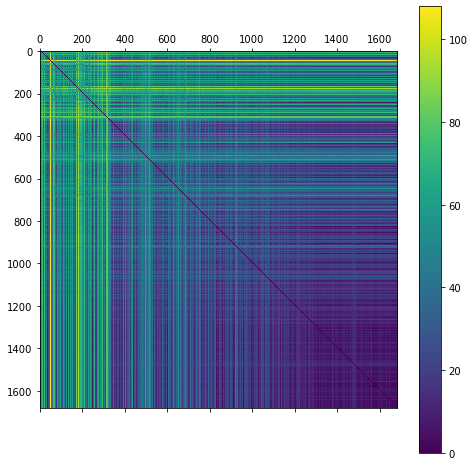

In [56]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_eucledian)
plt.colorbar() 

## Result
Die älteren Filme haben mehr Bewertungen gesamt. Aus diesem Grund erhöht sich die euklidische Distanz, obwohl sich die Ähnlichkeit kaum verändert.
Die Cosinus-Distanz bringt Abhilfe, da sie diese Eigenschaft ignoriert. (Vergleiche Schaubilder)

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

#### Random recommendations

In [114]:
C=np.zeros(np.shape(movies)[0])
for i in range(np.shape(movies)[0]):
    C[i]=ratings['movie_id'][i]-1
getNameByID(np.random.choice(C,5))

0               Toy Story (1995)
195    Dead Poets Society (1989)
327     Conspiracy Theory (1997)
567                 Speed (1994)
206    Cyrano de Bergerac (1990)
Name: title, dtype: object

#### Top 5 Movies

In [289]:
# Create movie rating by average matrix A
A=np.zeros(np.shape(movies)[0])
for i in range(0,np.shape(movies)[0]):
    A[i]=np.mean(R[:,i])#R[:,i].sum()/np.shape(users)[0]
A

array([1.85896076, 0.44538706, 0.28950159, ..., 0.00212089, 0.00318134,
       0.00318134])

In [290]:
# Return 5 best rated movies by average
getNameByID(A.argsort()[-5:])[::-1]

49                   Star Wars (1977)
99                       Fargo (1996)
180         Return of the Jedi (1983)
257                    Contact (1997)
173    Raiders of the Lost Ark (1981)
Name: title, dtype: object

#### Result
Bei der zufälligen Recommendation können möglicherweise interessante Filme vorschlagen werden. Die Diversität ist sehr hoch und es werden wahrscheinlich häufiger neue Filme vorgeschlagen.<br>

Bei den Top-5-Filmen von allen Usern ist die Diversität sehr gering, da so gut wie immer schon bekannte Filme vorgeschlagen werden. Da diese Filme sehr beliebt sind, kann
es natürlich sein, dass die Filme häufiger angeschaut werden.

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


array([1.92975815e+02, 5.07954113e+01, 4.48492807e+01, ...,
       4.84719748e-03, 3.25223849e-03, 8.77126921e-05])

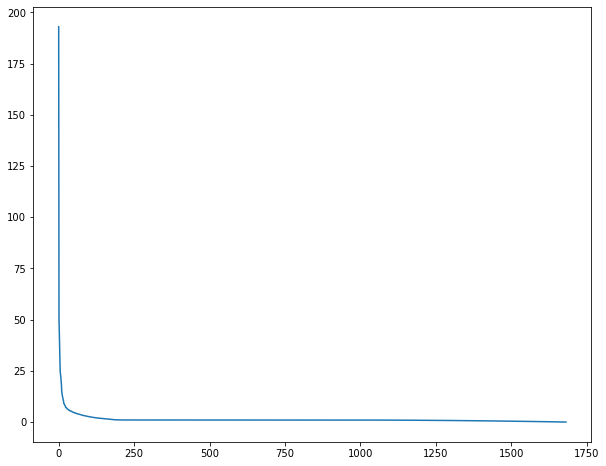

In [158]:
D=D_cosine

U,S,V=np.linalg.svd(D)

# plt.rcParams['figure.figsize'] = (10.0, 8.0)
fig, axes = plt.subplots()
axes.plot(S)
# axes.set_ylim([0, 25])
# axes.set_xlim([0, 50])
S

In [280]:
mask = (S > 10)
#mask

In [281]:
indices =np.where(mask)
#indices

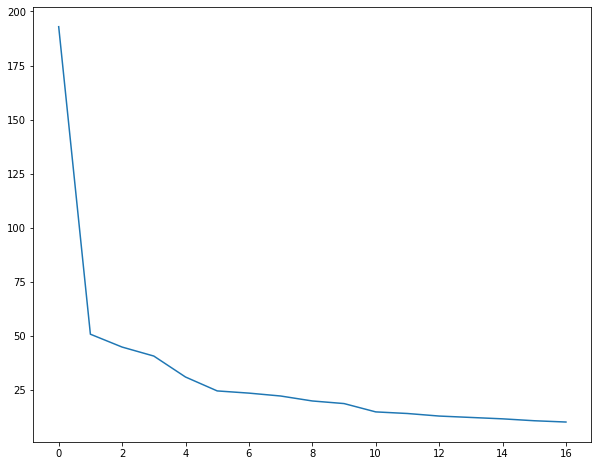

In [282]:
fig, axes = plt.subplots()
axes.plot(S[indices])

In [283]:
#D_svd=np.dot(U[:,indices]*S[indices],V[indices,:])
D_svd=np.dot(U[:,:np.shape(S[indices])[0]]*S[:np.shape(S[indices])[0]],V[:np.shape(S[indices])[0],:])
D_svd

array([[ 0.61559443,  0.41158611,  0.32617127, ..., -0.01345716,
         0.03070358,  0.03483063],
       [ 0.41158611,  0.53874082,  0.29183533, ...,  0.00704544,
         0.06727354,  0.04193249],
       [ 0.32617127,  0.29183533,  0.33855848, ..., -0.00700032,
         0.04532564,  0.06438841],
       ...,
       [-0.01345716,  0.00704544, -0.00700032, ...,  0.06425314,
         0.00801757, -0.00713298],
       [ 0.03070358,  0.06727354,  0.04532564, ...,  0.00801757,
         0.02546526,  0.01525317],
       [ 0.03483063,  0.04193249,  0.06438841, ..., -0.00713298,
         0.01525317,  0.02947313]])

In [284]:
# D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
# D=D_svd
print(np.shape(D_svd))
print(np.shape(D_cosine))

(1682, 1682)
(1682, 1682)


In [285]:
D=D_svd
CII("Casablanca")

recommending movies for: 'Casablanca (1942)'


173    Raiders of the Lost Ark (1981)
134      2001: A Space Odyssey (1968)
482                 Casablanca (1942)
190                    Amadeus (1984)
203         Back to the Future (1985)
Name: title, dtype: object

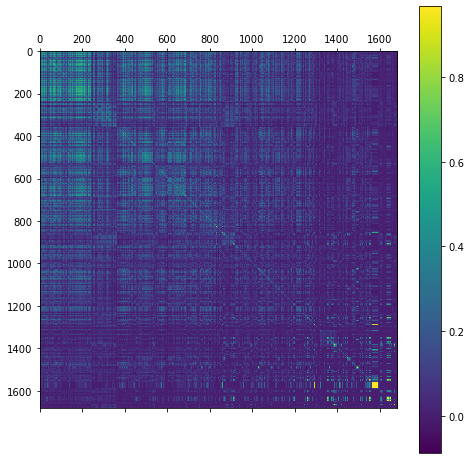

In [286]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_svd)
plt.colorbar() 

### Result
Die Distanzmatrix mit der Sigular Value Decomposition $D'$ erziehlt ähnliche Ergebnisse, wie die normale Cosinus-Disstanzmatrix $D'$. 

## TODO: